# Eigenpair Flow Demonstration

This notebook demonstrates the use of the `eigenpairflow` library to track the eigenvalues and eigenvectors of a one-parameter family of symmetric matrices $A(t)$.

## Mathematical Background

Given a one-parameter family of symmetric matrices $A(t)$, we consider its eigenvalue decomposition:
$$ A(t) = Q(t) \Lambda(t) Q(t)^T $$
where $Q(t)$ is an orthogonal matrix of eigenvectors and $\Lambda(t)$ is a diagonal matrix of eigenvalues.

By differentiating the equation $A(t)Q(t) = Q(t)\Lambda(t)$, we can derive a system of ordinary differential equations (ODEs) for $Q(t)$ and $\Lambda(t)$. The core equation for the derivatives is:
$$ F(t) = \frac{d\Lambda}{dt} + [H(t), \Lambda(t)] $$
where $F(t) = Q(t)^T \frac{dA}{dt} Q(t)$ and $H(t) = Q(t)^T \frac{dQ}{dt}$ is a skew-symmetric matrix.

The `eigenpairflow` library solves this system of ODEs to track the continuous evolution of eigenvalues and eigenvectors.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from eigenpairflow.main import track_and_analyze_eigenvalue_decomposition, create_n_partite_graph
from eigenpairflow.magnitude import calculate_magnitudes_and_pseudo
from eigenpairflow.types import EigenTrackingResults
from eigenpairflow.visualization import plot_eigen_tracking_results, plot_eigenvalue_trajectories, plot_reconstruction_error, plot_magnitudes

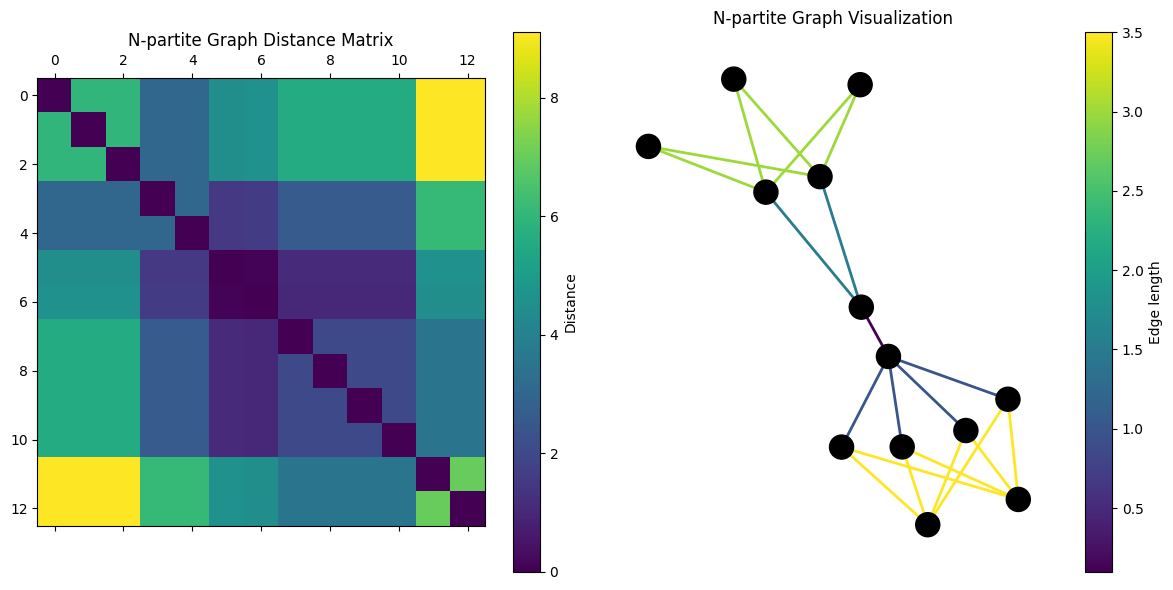

In [2]:
# --- Problem Setup: Create an n-partite graph ---
partition_sizes = [3, 2, 1, 1, 4, 2]
lengths = {
    (0, 1): 3.0,
    (1, 2): 1.5,
    (2, 3): 0.1,
    (3, 4): 1.0,
    (4, 5): 3.5
}

G = create_n_partite_graph(partition_sizes, lengths)

# --- Visualize the graph distance matrix and the graph initially ---
D = np.array(nx.floyd_warshall_numpy(G, weight='length'))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
cmap = plt.cm.viridis

im = axes[0].matshow(D, cmap=cmap)
axes[0].set_title("N-partite Graph Distance Matrix")
fig.colorbar(im, ax=axes[0], label='Distance')

pos = nx.spring_layout(G, seed=42)
node_colors = ['black'] * len(G.nodes())
edge_lengths_list = [G[u][v]['length'] for u, v in G.edges()]

nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_lengths_list,
        width=2.0, edge_cmap=cmap, ax=axes[1])
axes[1].set_title("N-partite Graph Visualization")
sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=min(edge_lengths_list), vmax=max(edge_lengths_list)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes[1], label='Edge length')

plt.tight_layout()
plt.show()


--- Starting tracking and analysis WITH correction ---


Tracking and analysis with correction finished successfully.
Plotting results with correction...


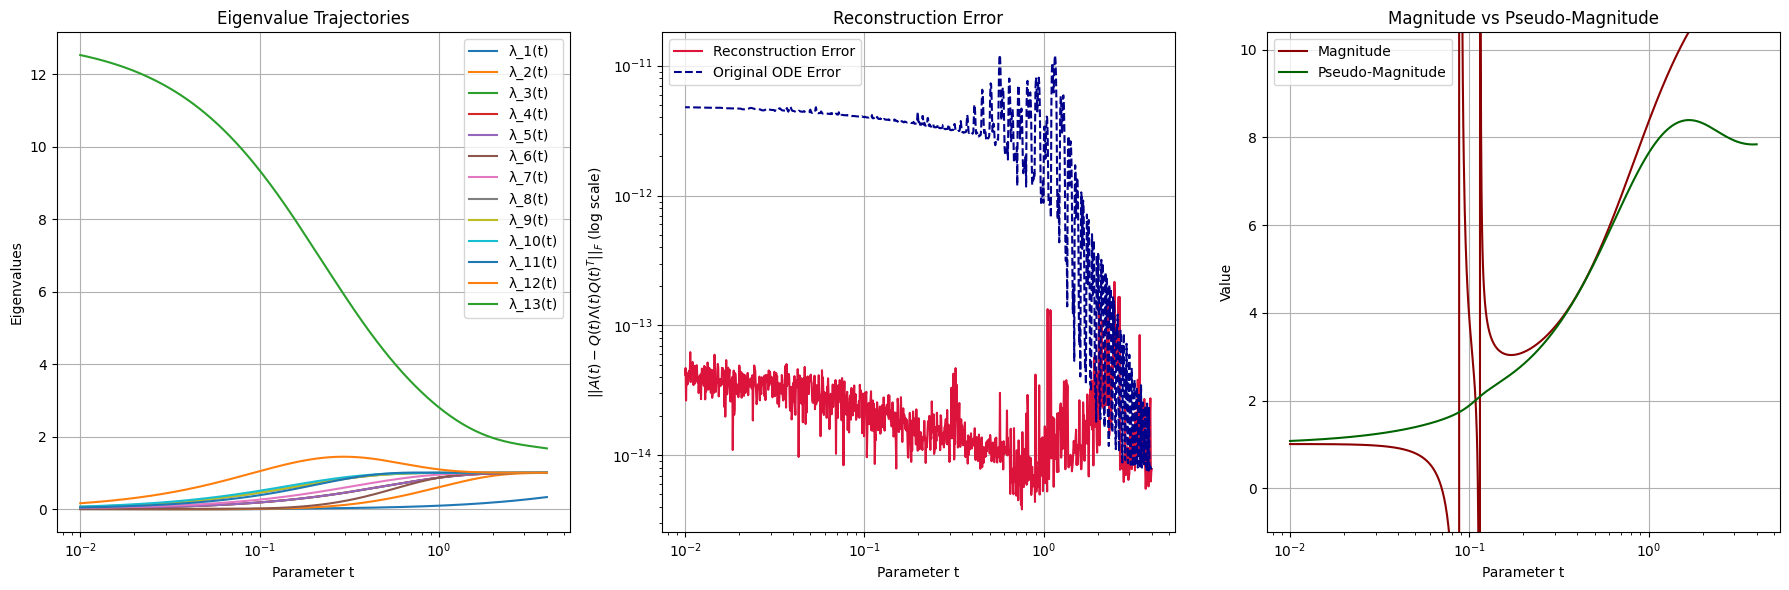


--- Starting tracking and analysis WITHOUT correction ---


Tracking and analysis without correction finished successfully.
Plotting results without correction...


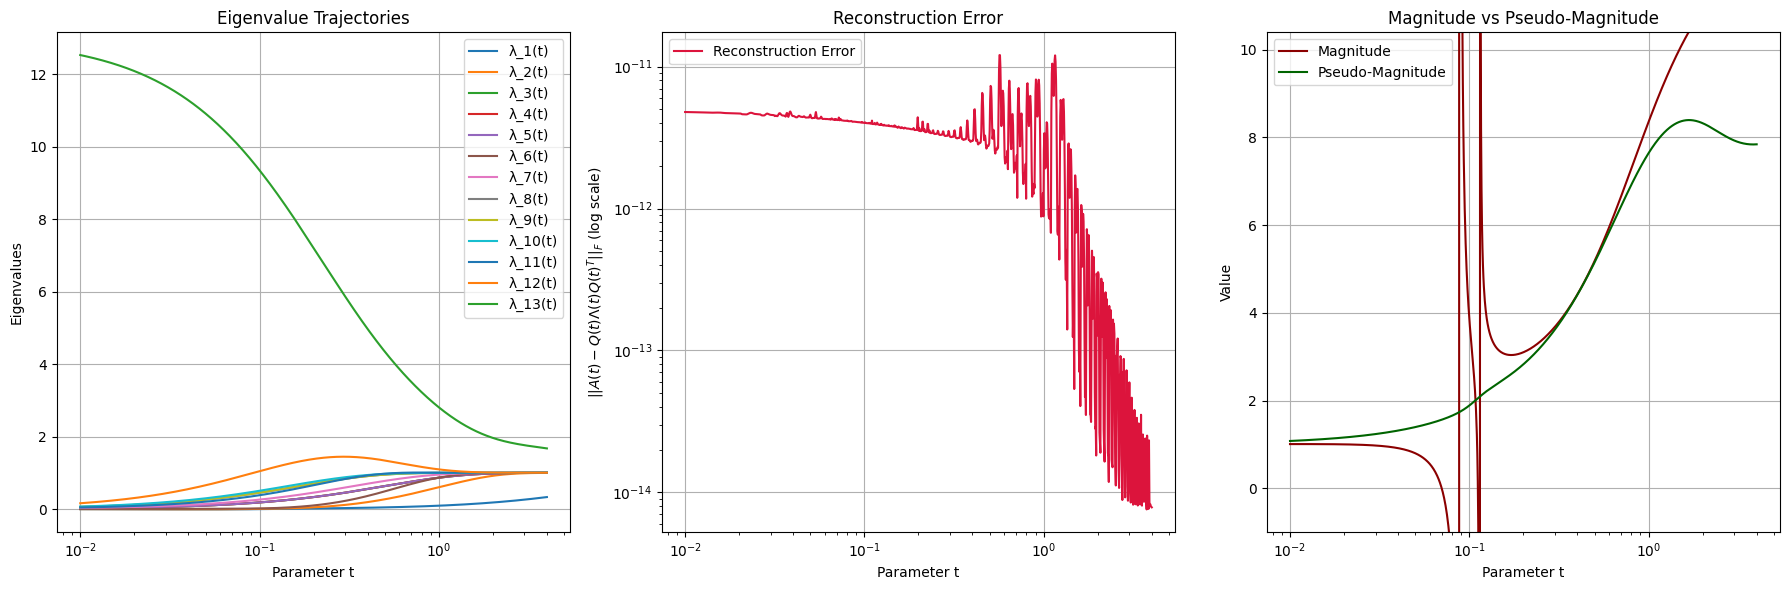

In [3]:
# --- Run Analysis and Plot Results ---
print("\n--- Starting tracking and analysis WITH correction ---")
results_corrected = track_and_analyze_eigenvalue_decomposition(G, apply_correction=True)

if results_corrected.success:
    print("Tracking and analysis with correction finished successfully.")
    print("Plotting results with correction...")
    plot_eigen_tracking_results(results_corrected)
else:
    print(f"Tracking and analysis with correction failed: {results_corrected.message}")

print("\n--- Starting tracking and analysis WITHOUT correction ---")
results_original = track_and_analyze_eigenvalue_decomposition(G, apply_correction=False)

if results_original.success:
    print("Tracking and analysis without correction finished successfully.")
    print("Plotting results without correction...")
    plot_eigen_tracking_results(results_original)
else:
    print(f"Tracking and analysis without correction failed: {results_original.message}")